In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler



In [2]:
dataset = pd.read_csv('c://data/train.csv')

Обзор датасета

In [3]:
dataset.shape

(891, 12)

In [4]:
dataset.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Оценим пустые ячейки

In [5]:
dataset.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
dataset.drop(columns = 'Cabin', axis = 1, inplace = True)

Cabin очень много пропусков, использовать не будем.

Расчитаем возраст средний и медианный:

In [7]:
print('Средний: ', dataset.Age.mean())
print('Медианный: ', dataset.Age.median())

Средний:  29.69911764705882
Медианный:  28.0


Значения близки, берём средний и заполняем им пробелы:

In [8]:
dataset.Age = dataset.Age.fillna(dataset.Age.mean())

Уберем строки с пустым Embarked

In [9]:
dataset.dropna(inplace = True)
dataset.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

Посмотрим отношение погибших и выживших

<AxesSubplot:xlabel='Survived', ylabel='count'>

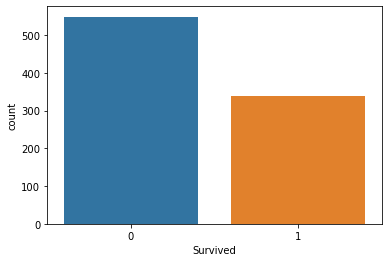

In [10]:
sns.countplot(x='Survived', data=dataset)

Разделим по полу.
Мужчин погибло заметно больше.

<AxesSubplot:xlabel='Survived', ylabel='count'>

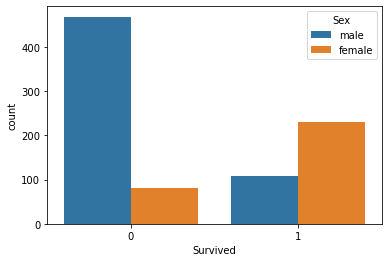

In [11]:
sns.countplot(x='Survived', hue='Sex', data=dataset)

Разделим на классы кают.
Видно зависимость от класса каюты. 

<AxesSubplot:xlabel='Survived', ylabel='count'>

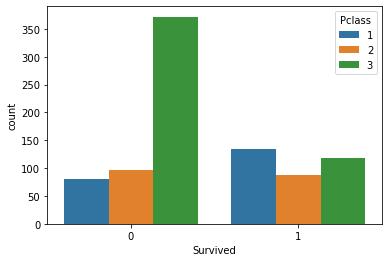

In [12]:
sns.countplot(x='Survived', hue='Pclass', data=dataset)

Создадим новые столбцы-переменные для категориальных признаков. Присвоим значения 0 или 1. И первый уберем тк дублирующаяся информация

In [13]:
sex = pd.get_dummies(dataset['Sex'], drop_first=True)
embarked = pd.get_dummies(dataset['Embarked'], drop_first = True)
pclass = pd.get_dummies(dataset['Pclass'], drop_first = True)
#dataset.head(3)
#dataset.drop(columns = 'Sex', axis = 1, inplace = True)

#dataset = pd.concat([sex], axis =1)
#dataset.head(5)
#dataset.drop(columns = 'female', axis = 1, inplace = True)

Добавим данные столбцы в датасет

In [14]:
dataset = pd.concat([dataset, sex, embarked, pclass], axis = 1)
dataset.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S,2,3
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1,0,1


Удалим столбцы Sex, Pclass, Embarked, PassengerId, Ticket, Name

In [15]:
dataset.drop(['PassengerId', 'Pclass', 'Name', 'Sex', 'Ticket', 'Embarked'], axis = 1, inplace = True)
dataset.head(3)

,Survived,Age,SibSp,Parch,Fare,male,Q,S,2,3
0,0,22.0,1,0,7.2500,1,0,1,0,1
1,1,38.0,1,0,71.2833,0,0,0,0,0
2,1,26.0,0,0,7.9250,0,0,1,0,1


Теперь все переменные либо количественные либо категориальные

In [16]:
# Сделаем нормализацию для Age и Fare. 
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# columns = ['Age', 'Fare']
# scaler.fit(dataset[columns])
# dataset[columns] = scaler.transform(dataset[columns])
# dataset.head(5)

Переменные 2, 3 выражены числами, сделаем строкой

In [17]:
dataset.columns = dataset.columns.map(str)
dataset.columns

Index(['Survived', 'Age', 'SibSp', 'Parch', 'Fare', 'male', 'Q', 'S', '2',
       '3'],
      dtype='object')

Назначим признаки и таргет. И затем разделим данные на тренинг и тест 80 на 20

In [18]:
from sklearn.model_selection import train_test_split
X = dataset.drop('Survived', axis =1 )
y = dataset['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=13)


Обучение

In [19]:
# Берем удобную функцию с семинара
from sklearn.metrics import (mean_squared_error, mean_absolute_error, r2_score, 
                             mean_absolute_percentage_error, confusion_matrix, 
                             ConfusionMatrixDisplay, 
                             balanced_accuracy_score, accuracy_score, precision_score, 
                             recall_score, f1_score, roc_auc_score, roc_curve, auc,
                             classification_report)

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.pipeline import make_pipeline
from sklearn.metrics import RocCurveDisplay

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


def try_model(model, X_train, y_train, X_test, y_test, model_params=None):
    if model_params is None:
        model_params = dict()
    print(model.__name__)
    pipeline = make_pipeline(StandardScaler(), model(**model_params))
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    print('Accuracy:', accuracy_score(y_test, y_pred))
    print('Precision:', precision_score(y_test, y_pred))
    print('Recall:', recall_score(y_test, y_pred))
    print('F1 score:', f1_score(y_test, y_pred))

    fpr, tpr, thresholds = roc_curve(y_test, pipeline.predict_proba(X_test)[:, 1])
    plt.plot(fpr, tpr, color="darkorange", label=f"ROC curve (area = {auc(fpr, tpr):0.3f})")
    plt.plot([0, 1], [0, 1], color="navy", linestyle="--")
    plt.legend()

    return pipeline


Логистическая регрессия

LogisticRegression
Accuracy: 0.8089887640449438
Precision: 0.8545454545454545
Recall: 0.6438356164383562
F1 score: 0.7343750000000001


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

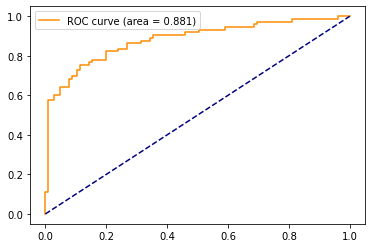

In [20]:
try_model(LogisticRegression, X_train, y_train, X_test, y_test)

Наивный байесовский алгоритм

GaussianNB
Accuracy: 0.797752808988764
Precision: 0.9302325581395349
Recall: 0.547945205479452
F1 score: 0.689655172413793


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('gaussiannb', GaussianNB())])

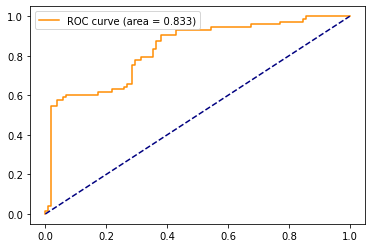

In [21]:
try_model(GaussianNB, X_train, y_train, X_test, y_test)

Ближайшие соседи

KNeighborsClassifier
Accuracy: 0.8202247191011236
Precision: 0.9019607843137255
Recall: 0.6301369863013698
F1 score: 0.7419354838709677


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kneighborsclassifier', KNeighborsClassifier(n_neighbors=7))])

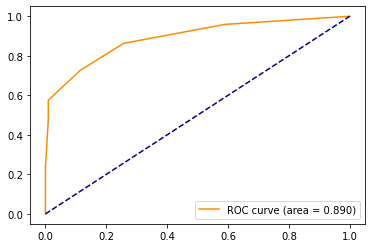

In [22]:
try_model(KNeighborsClassifier, X_train, y_train, X_test, y_test, model_params=dict(n_neighbors=7)
)

Классификация с помощью сегментации

SVC
Accuracy: 0.8202247191011236
Precision: 0.8596491228070176
Recall: 0.6712328767123288
F1 score: 0.7538461538461538


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(kernel='linear', probability=True))])

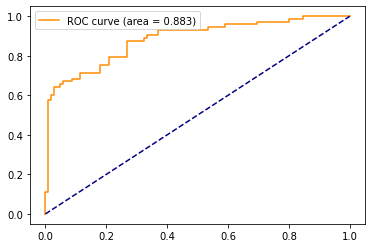

In [23]:
try_model(SVC, X_train, y_train, X_test, y_test,
          model_params=dict(
            kernel='linear',
            probability=True,
))

Из всех подходов считаю лучше всего показал себя Метод блтжайших соседей. Так как при сопоставимых значениях Accuracy, Precision, Recall, F1 он имеет самую плавную ROC кривую и максимальную площадь под ней. 